In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("./train.csv")

In [3]:
df.shape

(71236, 50)

In [4]:
df.isna().sum()

enc_id                          0
patient_id                      0
race                         1621
gender                          0
age                             0
weight                      68986
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  28178
medical_specialty           34930
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         15
diag_2                        244
diag_3                        989
number_diagnoses                0
max_glu_serum               67515
A1Cresult                   59356
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [5]:
upper_thresh = 0.3 # change this value later to test the occuring percentage
lower_thresh = 0.02

In [6]:
columns_to_drop = df.isna().sum()[df.isna().sum() / df.shape[0] > upper_thresh]

Drop weight, max_glu_serum and A1Cresult

In [7]:
df.isna().sum()[df.isna().sum() != 0]

race                  1621
weight               68986
payer_code           28178
medical_specialty    34930
diag_1                  15
diag_2                 244
diag_3                 989
max_glu_serum        67515
A1Cresult            59356
dtype: int64

In [8]:
columns_to_drop

weight               68986
payer_code           28178
medical_specialty    34930
max_glu_serum        67515
A1Cresult            59356
dtype: int64

In [9]:
df.drop(columns=columns_to_drop.keys(), inplace=True)
df.shape

(71236, 45)

In [10]:
null_vals = df.isna().sum()[df.isna().sum() != 0] / df.shape[0]
rows_to_drop = null_vals[null_vals < lower_thresh]
rows_to_drop

diag_1    0.000211
diag_2    0.003425
diag_3    0.013883
dtype: float64

In [11]:
df.drop(df[df['diag_1'].isna()].index)

,enc_id,patient_id,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmission_id
0,88346340,2488608,Caucasian,Male,[60-70),1,2,6,3,54,...,No,Steady,No,No,No,No,No,Ch,Yes,2
1,92001408,52133202,Caucasian,Male,[70-80),2,6,1,7,50,...,No,No,No,No,No,No,No,No,Yes,1
2,169424316,40945509,Caucasian,Female,[70-80),3,2,1,7,49,...,No,Up,No,No,No,No,No,Ch,Yes,1
3,272987082,38850777,Caucasian,Female,[50-60),1,1,7,1,1,...,No,No,No,No,No,No,No,No,Yes,2
4,150600612,72738225,Caucasian,Female,[80-90),1,6,7,6,58,...,No,Down,No,No,No,No,No,Ch,Yes,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71231,198619164,85063725,Caucasian,Male,[70-80),1,1,7,6,61,...,No,No,No,No,No,No,No,No,Yes,1
71232,177404100,86244345,Caucasian,Male,[90-100),1,3,7,5,36,...,No,No,No,No,No,No,No,No,No,2
71233,50905206,5131368,Caucasian,Male,[70-80),3,6,1,6,62,...,No,Steady,No,No,No,No,No,Ch,Yes,2
71234,216431502,85969035,Hispanic,Male,[50-60),1,1,4,4,29,...,No,Steady,No,No,No,No,No,No,Yes,2


In [12]:
st = set()
for row in rows_to_drop.keys():
    st.update(df[df[row].isna()].index)
len(st)

1057

In [13]:
df.drop(list(st), inplace=True)

In [14]:
df.shape

(70179, 45)

In [15]:
df.isna().sum()[df.isna().sum() > 0]

race    1564
dtype: int64

In [16]:
df.head(1)

,enc_id,patient_id,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmission_id
0,88346340,2488608,Caucasian,Male,[60-70),1,2,6,3,54,...,No,Steady,No,No,No,No,No,Ch,Yes,2


In [17]:
df['race'].value_counts()

race
Caucasian          52673
AfricanAmerican    13111
Hispanic            1394
Other               1014
Asian                423
Name: count, dtype: int64

### For now imputing race using KNN imputer, also try imputing with Simple Imputer (to do)

#### Note: while using KNN imputer, assumption made that illness are more related to races

In [18]:
from sklearn.impute import SimpleImputer, KNNImputer

imputer = SimpleImputer(strategy='most_frequent')

In [19]:
# df['race'].mask(df['race'] == 'Caucasian', 1, inplace=True)
# df['race'].mask(df['race'] == 'AfricanAmerican', 2, inplace=True)
# df['race'].mask(df['race'] == 'Hispanic', 3, inplace=True)
# df['race'].mask(df['race'] == 'Other', 4, inplace=True)
# df['race'].mask(df['race'] == 'Asian', 5, inplace=True)

In [20]:
df.head(1)

,enc_id,patient_id,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmission_id
0,88346340,2488608,Caucasian,Male,[60-70),1,2,6,3,54,...,No,Steady,No,No,No,No,No,Ch,Yes,2


In [21]:
df['race'].value_counts()

race
Caucasian          52673
AfricanAmerican    13111
Hispanic            1394
Other               1014
Asian                423
Name: count, dtype: int64

In [22]:
pd.DataFrame(imputer.fit_transform(df[['race']])).value_counts()

Caucasian          54237
AfricanAmerican    13111
Hispanic            1394
Other               1014
Asian                423
Name: count, dtype: int64

In [23]:
df['race_imputed'] = imputer.fit_transform(df[['race']]).reshape(-1)

In [24]:
df['race_imputed'].value_counts()

race_imputed
Caucasian          54237
AfricanAmerican    13111
Hispanic            1394
Other               1014
Asian                423
Name: count, dtype: int64

In [25]:
df.isna().sum()[df.isna().sum() != 0]

race    1564
dtype: int64

In [26]:
df.drop('race', inplace=True, axis=1)

## EDA


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70179 entries, 0 to 71235
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   enc_id                    70179 non-null  int64 
 1   patient_id                70179 non-null  int64 
 2   gender                    70179 non-null  object
 3   age                       70179 non-null  object
 4   admission_type_id         70179 non-null  int64 
 5   discharge_disposition_id  70179 non-null  int64 
 6   admission_source_id       70179 non-null  int64 
 7   time_in_hospital          70179 non-null  int64 
 8   num_lab_procedures        70179 non-null  int64 
 9   num_procedures            70179 non-null  int64 
 10  num_medications           70179 non-null  int64 
 11  number_outpatient         70179 non-null  int64 
 12  number_emergency          70179 non-null  int64 
 13  number_inpatient          70179 non-null  int64 
 14  diag_1                    7

In [28]:
df.iloc[0]

enc_id                       88346340
patient_id                    2488608
gender                           Male
age                           [60-70)
admission_type_id                   1
discharge_disposition_id            2
admission_source_id                 6
time_in_hospital                    3
num_lab_procedures                 54
num_procedures                      3
num_medications                    10
number_outpatient                   0
number_emergency                    0
number_inpatient                    0
diag_1                            410
diag_2                            428
diag_3                            414
number_diagnoses                    5
metformin                          No
repaglinide                        No
nateglinide                        No
chlorpropamide                     No
glimepiride                        No
acetohexamide                      No
glipizide                          No
glyburide                      Steady
tolbutamide 

In [29]:
len(df['patient_id'].unique())

53344

#### Can do something with the payer_code, may represent privilige?? Also max_glu_serum could also be reintroduced

### Drop, ENC_ID, no need for Encounter ID and Patient ID

In [30]:
df['diabetesMed'].value_counts()

diabetesMed
Yes    54035
No     16144
Name: count, dtype: int64

In [31]:
one_val = []
dual_val = []

for col in df.columns:
    if (df[col].value_counts().count() == 1): one_val.append(col)
    if (df[col].value_counts().count() == 2): dual_val.append(col)

dual_val

['acetohexamide',
 'tolbutamide',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed']

In [32]:
df.drop(columns=one_val, inplace=True)

In [33]:
from category_encoders import OneHotEncoder
ohe_ops = []

In [34]:
def ohe_generator(col, df=df):
    if (df[col].value_counts().count() < 50):
        ohe = OneHotEncoder(use_cat_names=True, handle_unknown='ignore')
        gen_ohe_cols = ohe.fit_transform(df[col])
        df_to_ret = gen_ohe_cols
        ohe_ops.append(ohe)
    else:
        df_to_ret = df[col]
    return df_to_ret

In [35]:
cols = []
ohe_ops = []
for col in df.columns:
    cols.append(ohe_generator(col))

df_ohe = pd.concat(cols, axis=1)

In [36]:
len(ohe_ops)

35

### To establish Baseline, dropping diag_1, diag_2 and diag_3 for now

In [37]:
df_ohe.shape

(70179, 105)

In [38]:
df_ohe.drop(columns=['enc_id', 'patient_id', 'diag_1', 'diag_2', 'diag_3'], inplace=True)

In [39]:
X, y = df_ohe.drop('readmission_id', axis=1), df_ohe['readmission_id']

In [40]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [42]:
# rfc.fit(X_train, y_train)

In [43]:
rfc = RandomForestClassifier()
params = {
    # "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10, 20],
    # "min_samples_split": [2, 5, 10, 15, 20],
    # "criterion": ["gini", "entropy", "log_loss"]
}
rfc_gs = GridSearchCV(rfc, params)

In [44]:
rfc_gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10, 20]})

In [45]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

y_pred_rfc = rfc_gs.predict(X_val)
print("Accuracy Score: ", accuracy_score(y_val, y_pred_rfc))
# print("Roc Auc Score: ", roc_auc_score(y_val, y_pred_rfc))
print("Confusion Matrix: ", confusion_matrix(y_val, y_pred_rfc))

Accuracy Score:  0.5796523225990311
Confusion Matrix:  [[   9  616 1019]
 [   5 1652 3190]
 [   0 1070 6475]]


In [46]:
def get_test_df(test_df):
    g = []
    for col in df.columns:
        if col != 'readmission_id':
            g.append(test_df[col])
    
    return pd.concat(g, axis=1)

def transform(ops, df):
    return ops.transform(df)

def get_submit_df(ohe_ops):
    i = 0
    pred_df = []
    for col in test_df.columns:
        if df[col].value_counts().count() < 50:
            pred_df.append(transform(ohe_ops[i], test_df[col]))
            print(i, col)
            i += 1
        else:
            pred_df.append(test_df[col])
            
    df_tst = pd.concat(pred_df, axis=1)
    print(df_tst.shape)
    return df_tst

def submit(model, df_tst):    
    y_pred_sub = model.predict(df_tst)
    
    y_sub = pd.read_csv('sample_submission.csv')
    y_sub['readmission_id'] = y_pred_sub
    y_sub.to_csv('submission.csv')

### Test df

In [213]:
test_df = pd.read_csv('test.csv')
# test_df['race'].mask(test_df['race'] == 'Caucasian', 1, inplace=True)
# test_df['race'].mask(test_df['race'] == 'AfricanAmerican', 2, inplace=True)
# test_df['race'].mask(test_df['race'] == 'Hispanic', 3, inplace=True)
# test_df['race'].mask(test_df['race'] == 'Other', 4, inplace=True)
# test_df['race'].mask(test_df['race'] == 'Asian', 5, inplace=True)
test_df['race_imputed'] = imputer.transform(test_df[['race']]).reshape(-1)
test_df.drop('race', axis=1, inplace=True)
test_df = get_test_df(test_df)
test_df.drop(columns=['enc_id', 'patient_id', 'diag_1', 'diag_2', 'diag_3'], inplace=True)

In [232]:
# ans = submit(ohe_ops=ohe_ops)
# ans.isna().sum()[ans.isna().sum() > 0]

0 gender
1 age
2 admission_type_id
3 discharge_disposition_id
4 admission_source_id
5 time_in_hospital
6 num_procedures
7 number_outpatient
8 number_emergency
9 number_inpatient
10 number_diagnoses
11 metformin
12 repaglinide
13 nateglinide
14 chlorpropamide
15 glimepiride
16 acetohexamide
17 glipizide
18 glyburide
19 tolbutamide
20 pioglitazone
21 rosiglitazone
22 acarbose
23 miglitol
24 tolazamide
25 insulin
26 glyburide-metformin
27 glipizide-metformin
28 glimepiride-pioglitazone
29 metformin-rosiglitazone
30 metformin-pioglitazone
31 change
32 diabetesMed
33 race_imputed
(30530, 99)


chlorpropamide_No        1
chlorpropamide_Steady    1
chlorpropamide_Up        1
dtype: int64

In [249]:
ans.fillna(value=0, inplace=True)

In [251]:
# submit(rfc_gs, ans)

In [3]:
# import pandas as pd 
# sub = pd.read_csv('submission.csv', index_col=[0])
# sub.head(1)
# sub.to_csv('submission.csv', index=False)

### Use the patient id

In [50]:
df.shape

(70179, 42)

In [57]:
lst = df['patient_id'].to_list()
pat = {}
for i in lst:
    if i in pat:
        pat[i] += 1
    else:
        pat[i] = 1

In [59]:
len(pat)

53344

In [69]:

# sns.histplot(pat.values(), bins=100)
on = [i for i in pat if pat[i] == 1]
tw = [i for i in pat if pat[i] == 2]
mrth = [i for i in pat if pat[i] > 2]

In [71]:
def calc_bin(id):
    if id in on:
        return 1
    elif id in tw:
        return 2
    elif id in mrth:
        return 3
    else:
        return 0

In [143]:
df['new_patient_id'] = df['patient_id'].apply(lambda x: calc_bin(x)).astype(int)

In [144]:
df['new_patient_id'].value_counts()

new_patient_id
1    42993
2    13770
3    13416
Name: count, dtype: int64

In [162]:
t_df = df.drop(columns=['patient_id', 'diag_1', 'diag_2', 'diag_3'])

In [80]:
rfc = RandomForestClassifier()
params = {
    "n_estimators": [600],
    "max_depth": [20, 50],
    # "min_samples_split": [2, 5, 10, 15, 20],
    # "criterion": ["gini", "entropy", "log_loss"]
}
rfc_gs = GridSearchCV(rfc, params)

In [163]:
# t_df['race_imputed'].dtype == 'O'

r_df = pd.concat([test_df, t_df])
# test_df = pd.read_csv('test.csv')


from sklearn.preprocessing import LabelEncoder
le_lst = []
for col in r_df.columns:
    if r_df[col].dtype == 'O':
        le = LabelEncoder()
        r_df[col] = le.fit_transform(r_df[col])
        le_lst.append([col, le])

len(le_lst)

25

In [164]:
for t in le_lst:
    col, le = t
    t_df[col] = le.transform(t_df[col])

In [165]:
for t in le_lst:
    col, le = t
    test_df[col] = le.transform(test_df[col])

In [166]:
X, y = t_df.drop('readmission_id', axis=1), t_df['readmission_id']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [167]:
rfc_gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [20, 50], 'n_estimators': [600]})

In [168]:
def predict_stats(y_pred, y_val):
    y_pred_rfc = rfc_gs.predict(X_val)

    print("Accuracy Score: ", accuracy_score(y_val, y_pred_rfc))
    # print("Roc Auc Score: ", roc_auc_score(y_val, y_pred_rfc))
    print("Confusion Matrix: ", confusion_matrix(y_val, y_pred_rfc))

In [169]:
predict_stats(rfc_gs.predict(X_val), y_val)

Accuracy Score:  0.6805357651752636
Confusion Matrix:  [[  30 1060  554]
 [  19 2789 2039]
 [   4  808 6733]]


In [158]:
def get_test_df(test_df):
    g = []
    for col in df.columns:
        if col != 'readmission_id' and col != 'new_patient_id':
            g.append(test_df[col])
    
    return pd.concat(g, axis=1)

test_df = pd.read_csv('test.csv')
gn = test_df['patient_id']
test_df['race_imputed'] = imputer.transform(test_df[['race']]).reshape(-1)
test_df.drop('race', axis=1, inplace=True)
test_df = get_test_df(test_df)


In [159]:
test_df['new_patient_id'] = gn.apply(lambda x: calc_bin(x)).astype(int)
test_df.drop(columns=['patient_id', 'diag_1', 'diag_2', 'diag_3'], inplace=True)

In [152]:
i = 0
for t in le_lst:
    test_df[t[0]] = t[1].transform(test_df[t[0]])
    print(1)

1
1
1
1
1


ValueError: y contains previously unseen labels: 'Down'

In [118]:
test_df['gender'] = le_lst[0].transform(test_df['gender'])

In [120]:
test_df['gender'].value_counts()

gender
0    16473
1    14057
Name: count, dtype: int64

In [111]:
test_df['gender']

0          Male
1          Male
2        Female
3        Female
4          Male
          ...  
30525    Female
30526      Male
30527    Female
30528    Female
30529      Male
Name: gender, Length: 30530, dtype: object

In [170]:
pred_vals = rfc_gs.predict(test_df)
df_sub = pd.read_csv('sample_submission.csv')
df_sub['readmission_id'] = pred_vals
df_sub.to_csv('submission.csv', index=False)

<Axes: ylabel='Count'>

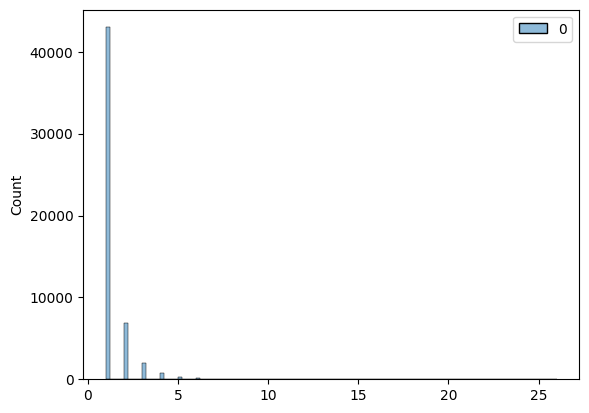

In [172]:
sns.histplot(pat.values(), bins=100)